In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [93]:
df = pd.read_csv('user_courses_review_test_set.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   course_name     154 non-null    object
 1   lecture_name    154 non-null    object
 2   review_rating   154 non-null    int64 
 3   review_comment  150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.9+ KB


In [95]:
df.describe()

,review_rating
count,154.000000
mean,4.642857
std,0.805849
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


## Basic Analysis - Ratings vs Count

/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_53644/1333308521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_rating', y='rating_count', data=rating_counts, palette='viridis')


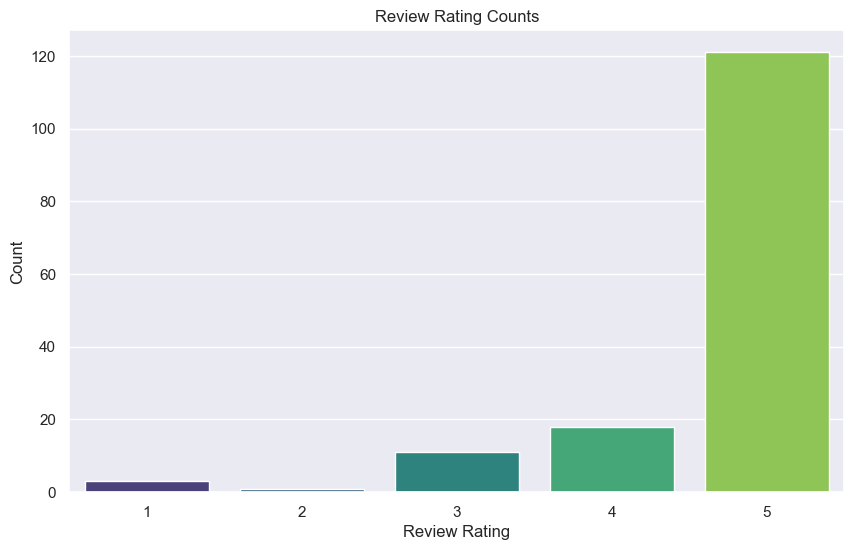

In [96]:
rating_counts = df['review_rating'].value_counts().reset_index()
rating_counts.columns = ['review_rating', 'rating_count']

plt.figure(figsize=(10, 6))
sns.barplot(x='review_rating', y='rating_count', data=rating_counts, palette='viridis')
plt.title('Review Rating Counts')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

## Intermediate Analysis - Average Rating

/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_53644/692710488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_rating', y='course_name', data=avg_rating_per_course, palette='viridis')


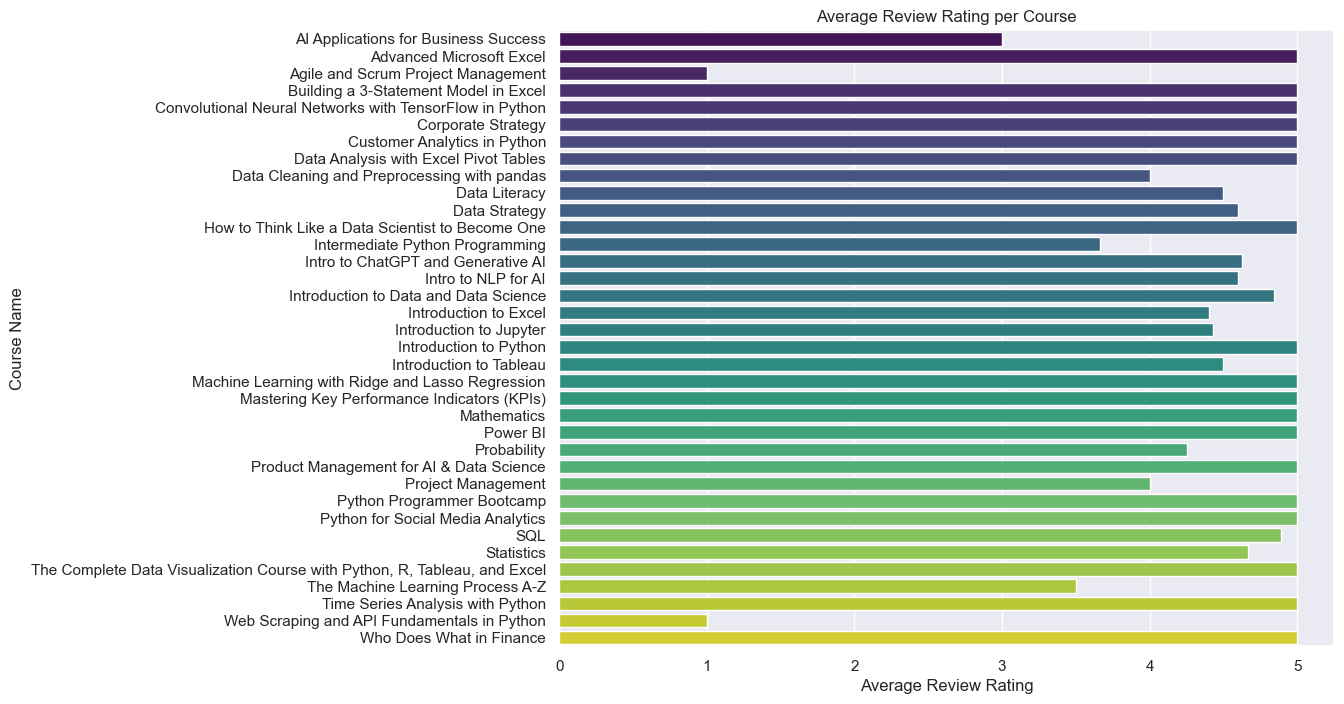

In [97]:
avg_rating_per_course = df.groupby('course_name')['review_rating'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='review_rating', y='course_name', data=avg_rating_per_course, palette='viridis')
plt.title('Average Review Rating per Course')
plt.xlabel('Average Review Rating')
plt.ylabel('Course Name')
plt.show()

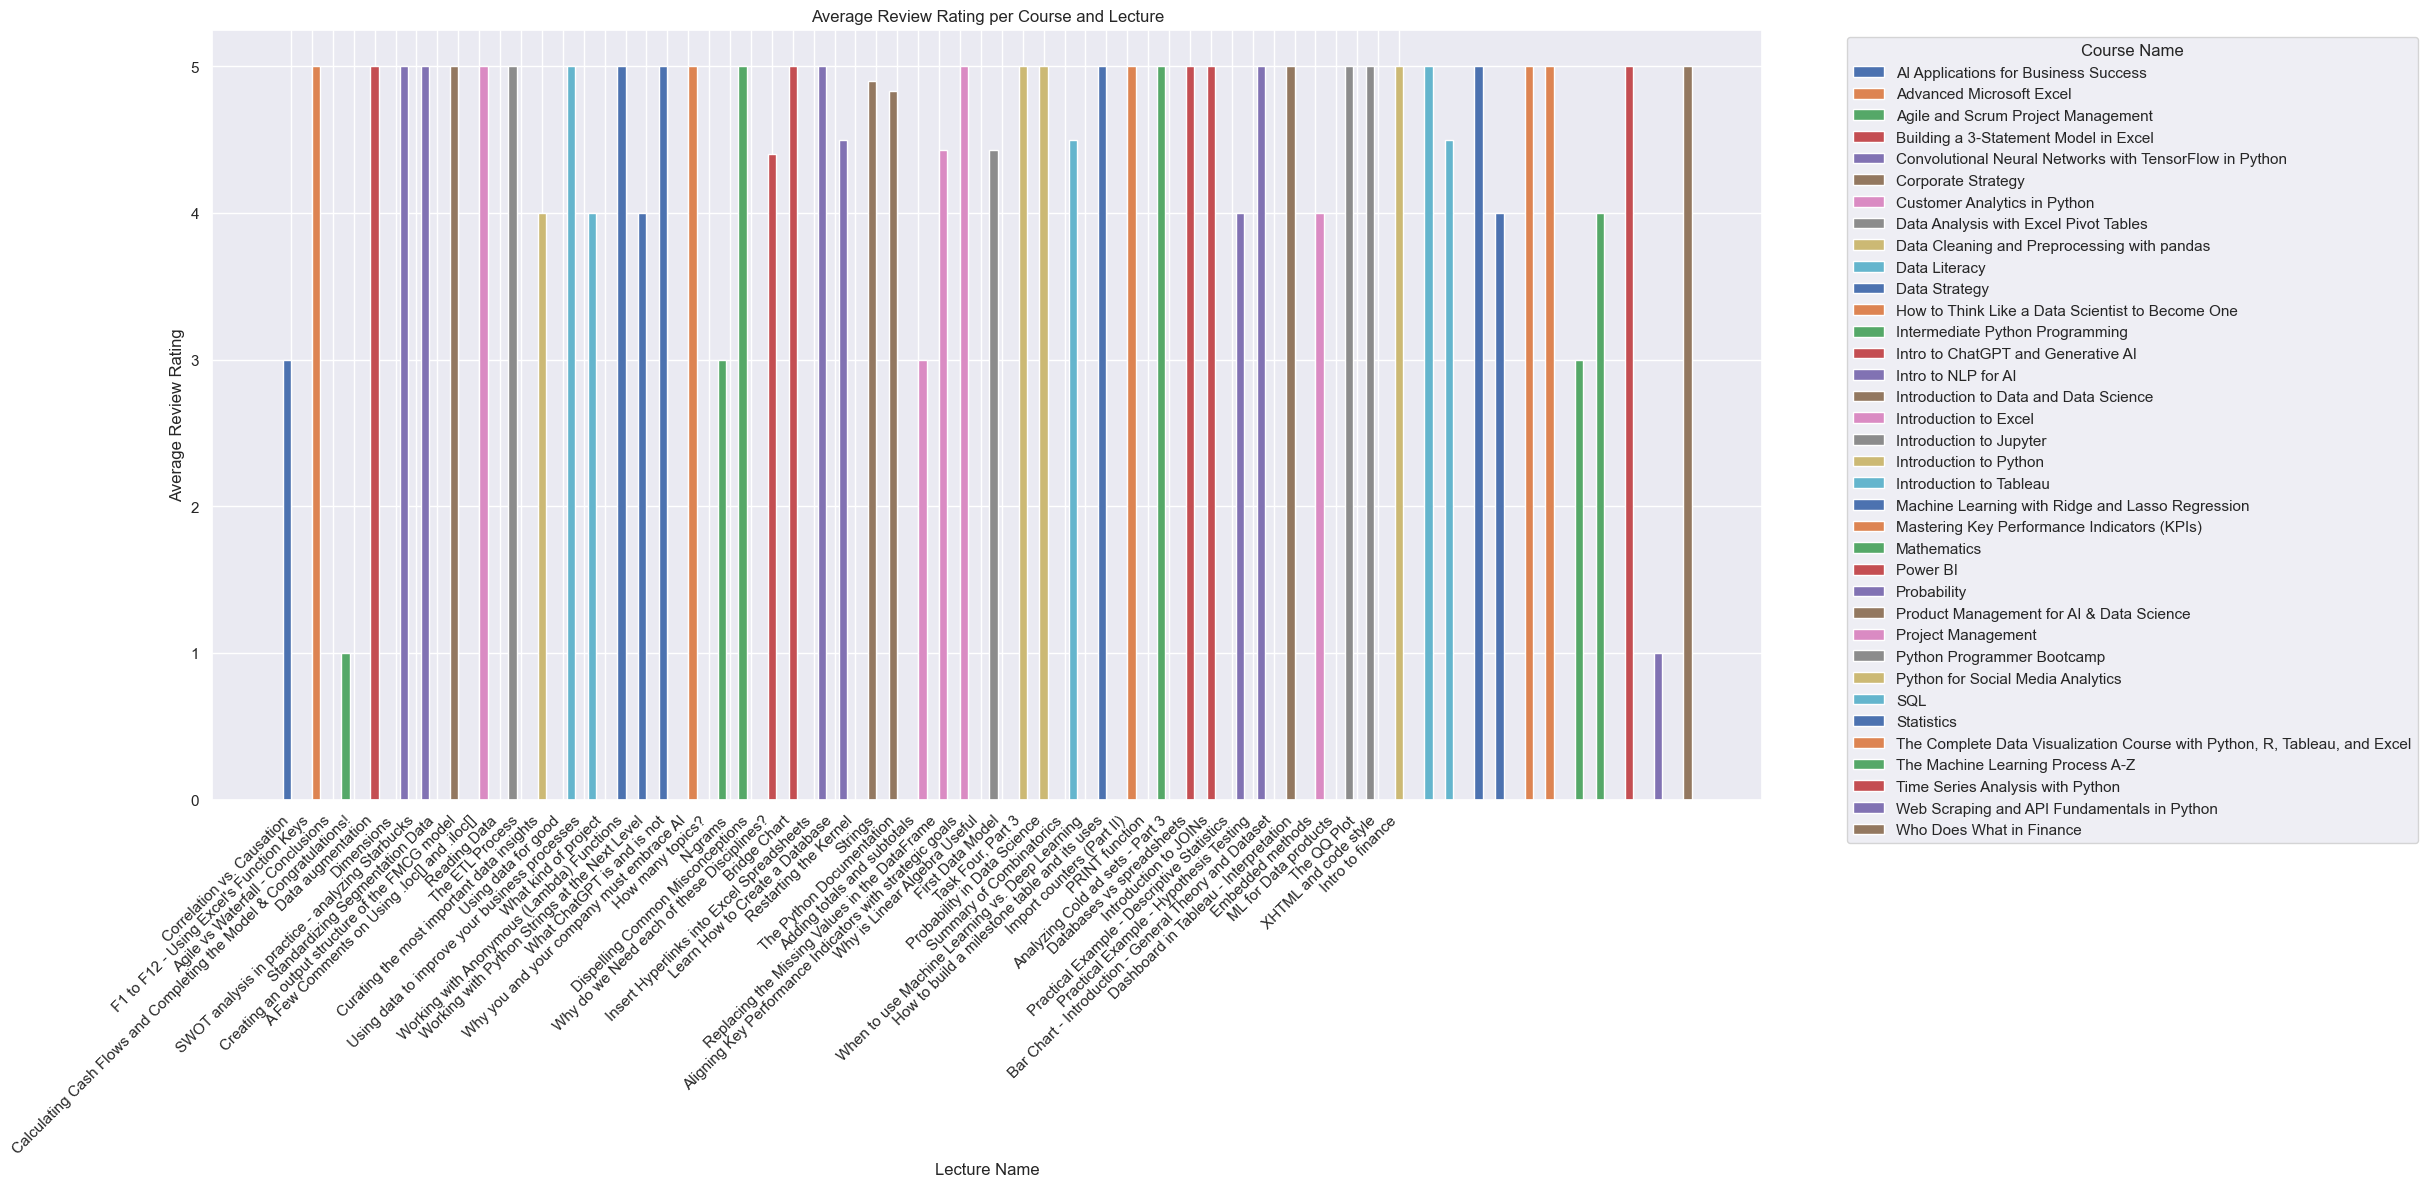

In [98]:
avg_rating_per_lecture = df.groupby(['course_name', 'lecture_name'])['review_rating'].mean().reset_index()

course_names = avg_rating_per_lecture['course_name'].unique()
course_indices = {name: i for i, name in enumerate(course_names)}
lecture_indices = np.arange(len(avg_rating_per_lecture))

bar_width = 0.4

fig, ax = plt.subplots(figsize=(20, 10))

for i, (course_name, group) in enumerate(avg_rating_per_lecture.groupby('course_name')):
    indices = lecture_indices[group.index]
    ax.bar(indices + i * bar_width, group['review_rating'], width=bar_width, label=course_name)

ax.set_xticks(lecture_indices + bar_width / 2)
ax.set_xticklabels(avg_rating_per_lecture['lecture_name'], rotation=45, ha='right')
ax.set_xlabel('Lecture Name')
ax.set_ylabel('Average Review Rating')
ax.set_title('Average Review Rating per Course and Lecture')
ax.legend(title='Course Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Sentiment Analysis

In [99]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ronitguptaaa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
sid = SentimentIntensityAnalyzer()

In [105]:
df['review_comment'] = df['review_comment'].astype(str)

df['sentiment'] = df['review_comment'].apply(lambda x: sid.polarity_scores(x)['compound'])
df[['Positive', 'Negative', 'Neutral', 'Compound']] = df['review_comment'].apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [106]:
df

,course_name,lecture_name,review_rating,review_comment,sentiment,Positive,Negative,Neutral,Compound
0,Advanced Microsoft Excel,F1 to F12 - Using Excel's Function Keys,5,perfect,0.5719,0.000,0.000,1.000,0.5719
1,Agile and Scrum Project Management,Agile vs Waterfall - Conclusions,1,The SCRUM chapter are full of errors,-0.3400,0.286,0.714,0.000,-0.3400
2,AI Applications for Business Success,Correlation vs. Causation,3,Bad quality of audio and narrative,-0.5423,0.412,0.588,0.000,-0.5423
3,AI Applications for Business Success,Correlation vs. Causation,3,I need documentation about lecture.,0.0000,0.000,1.000,0.000,0.0000
4,Building a 3-Statement Model in Excel,Calculating Cash Flows and Completing the Mode...,5,Great course! Ned has a talent for explaining ...,0.8168,0.000,0.546,0.454,0.8168
...,...,...,...,...,...,...,...,...,...
149,Web Scraping and API Fundamentals in Python,XHTML and code style,1,NOT WORTH IT,-0.1695,0.454,0.546,0.000,-0.1695
150,Who Does What in Finance,Intro to finance,5,Nice,0.4215,0.000,0.000,1.000,0.4215
151,Who Does What in Finance,Intro to finance,5,Information was great.,0.6249,0.000,0.328,0.672,0.6249
152,Who Does What in Finance,Intro to finance,5,great\n,0.6249,0.000,0.000,1.000,0.6249


In [115]:
sentiment_summary = df.groupby(['course_name', 'lecture_name'])['sentiment'].mean().reset_index()

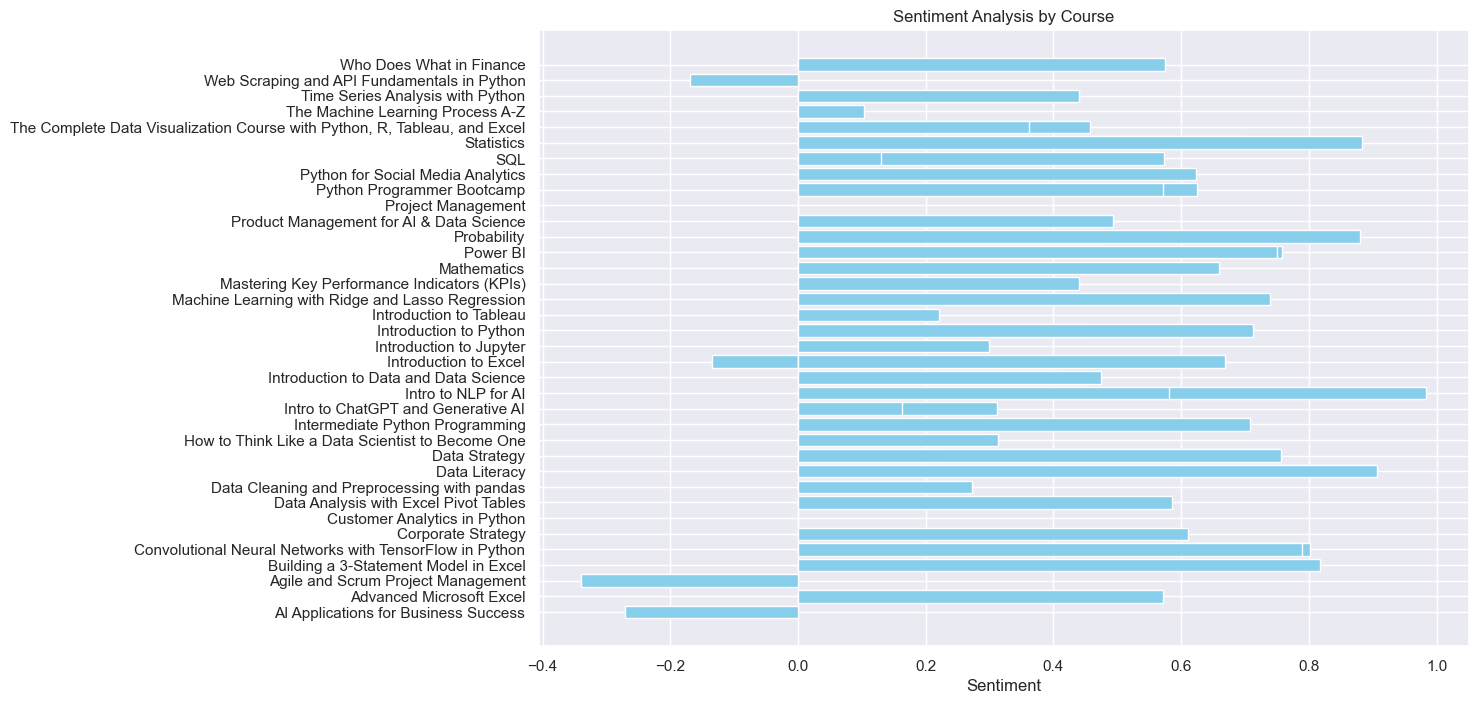

In [124]:
plt.figure(figsize=(12, 8))
plt.barh(sentiment_summary['course_name'], sentiment_summary['sentiment'], color='skyblue')
plt.xlabel('Sentiment')
plt.title('Sentiment Analysis by Course')
plt.show()